# <p style="background-color: lightgreen; font-family: Allura; color: black; font-size: 150%; text-align: center; border-radius: 15px 15px; padding: 15px;"><strong>Titanic - Machine Learning</strong></p>


**Autor ||** **Muhammad Abdullah**  
*IBM Certified Data Scientist*

I have been passionately learning in the field of data science for about 1.5 years, acquiring extensive knowledge. Here's a glimpse of what I've explored:

- **LinkedIn:** [Muhammad Abdullah Abrar](https://www.linkedin.com/in/muhammadabdullahabrar/)
- **GitHub:** [Your GitHub Profile](https://github.com/Abdullah-0-3)
- **Magic Gamma Telescope App:** [Click here to use app](https://magic-gamma-telescope.streamlit.app/)

For any suggestions or collaborations, feel free to reach out to me at abdullahabrar4843@gmail.com.



# <p style="background-color: lightgreen; font-family: Allura; color: black; font-size: 90%; text-align: center; border-radius: 15px 15px; padding: 15px;"><strong>Introduction</strong></p>

<p style="text-align:center">
    <img src="https://www.kaggle.com/competitions/3136/images/header" alt="Magic Gamma Telescope">

</p>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import warnings
warnings.filterwarnings('ignore') 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# <p style="background-color: lightgreen; font-family: Allura; color: black; font-size: 90%; text-align: center; border-radius: 15px 15px; padding: 15px;"><strong>Importing Libraries & Dataset</strong></p>

In [2]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [3]:
# importing dataset
df = pd.read_csv('../data/1. raw/train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
# checking information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# <p style="background-color: lightgreen; font-family: Allura; color: black; font-size: 90%; text-align: center; border-radius: 15px 15px; padding: 15px;"><strong>Exploratory Data Analysis</strong></p>

In [5]:
# percentage of null-values
(df.isnull().sum() / df.shape[0]) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

<Axes: title={'center': 'Null Values'}>

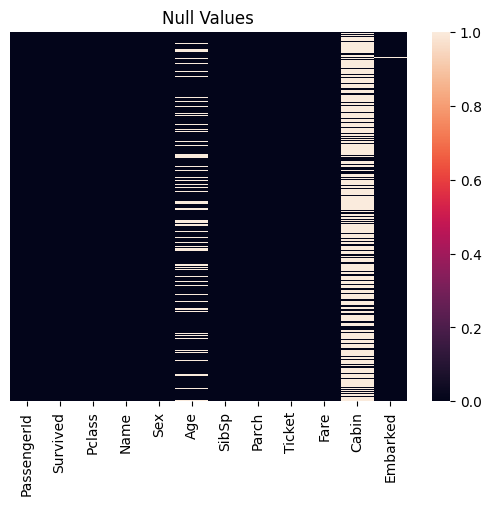

In [6]:
# graph for null values
plt.title('Null Values')
sns.heatmap(df.isnull(), yticklabels=False)

Most of the data is cleaned but Age and Cabin have many missing values

In [7]:
# unique values in cabin
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [8]:
# unique values in gender
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [9]:
# percentage of survived women
female_survived = df[(df['Sex'] == 'female') & (df['Survived'] == 1)].shape[0]
total_females = df[df['Sex'] == 'female'].shape[0]
female_survival_rate = (female_survived / total_females) * 100
print("Percentage of Female Survived:", female_survival_rate)

Percentage of Female Survived: 74.20382165605095


In [10]:
# percentage of survived women
male_survived = df[(df['Sex'] == 'male') & (df['Survived'] == 1)].shape[0]
total_males = df[df['Sex'] == 'male'].shape[0]
male_survival_rate = (male_survived / total_males) * 100
print("Percentage of Male Survived:", male_survival_rate)

Percentage of Male Survived: 18.890814558058924


([<matplotlib.patches.Wedge at 0x7f2add7ce1a0>,
 [Text(0.8839489990423482, 0.6547015862910605, 'Male Survival Rate'),
  Text(-0.8839490296911406, -0.6547015449104205, 'Female Survival Rate')],
 [Text(0.4821539994776444, 0.3571099561587602, '20.3%'),
  Text(-0.4821540161951675, -0.35710993358750204, '79.7%')])

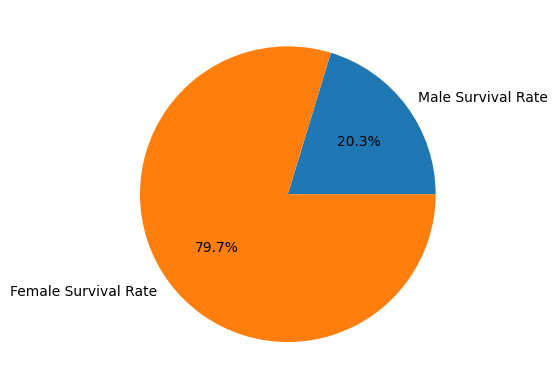

In [11]:
# pie chart
plt.pie([male_survival_rate, female_survival_rate],
       labels=['Male Survival Rate', 'Female Survival Rate'], 
       autopct='%1.1f%%')

**Survival by Gender**

Almost 75% of female were saved but only 20% males survived

Text(0, 0.5, 'Fare')

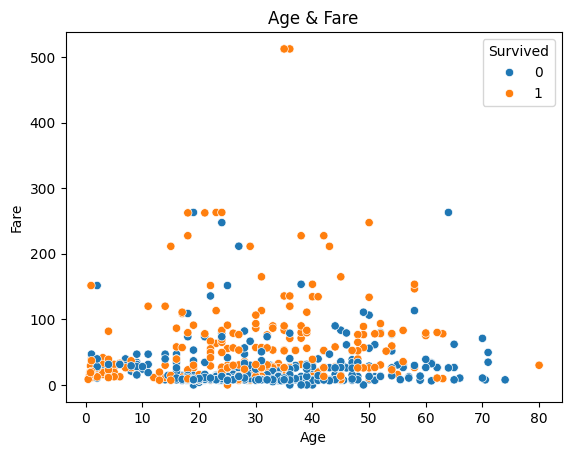

In [12]:
# scatter plot of Age & Fare
sns.scatterplot(df, x='Age', y='Fare', hue='Survived')
plt.title('Age & Fare')
plt.xlabel('Age')
plt.ylabel('Fare')

Text(0, 0.5, 'Fare')

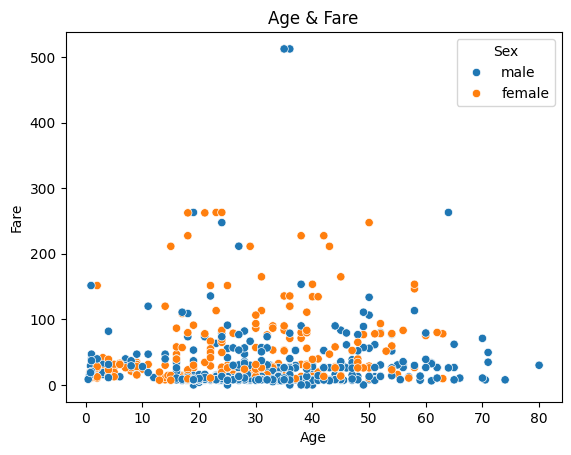

In [13]:
# scatter plot of Age & Fare
sns.scatterplot(df, x='Age', y='Fare', hue='Sex')
plt.title('Age & Fare')
plt.xlabel('Age')
plt.ylabel('Fare')

Text(0, 0.5, 'Fare')

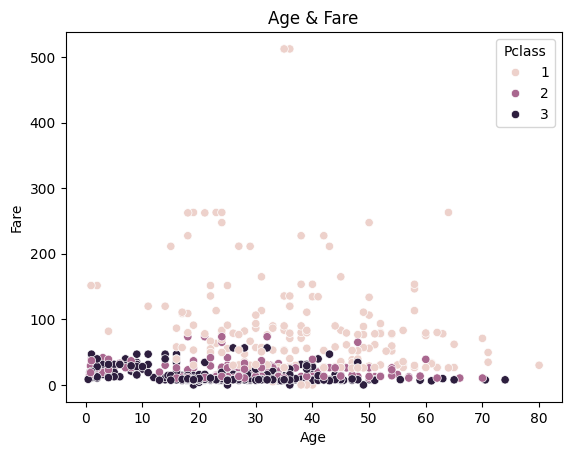

In [14]:
# scatter plot of Age & Fare
sns.scatterplot(df, x='Age', y='Fare', hue='Pclass')
plt.title('Age & Fare')
plt.xlabel('Age')
plt.ylabel('Fare')

You can see survied are mostly females & people wo gave higher fare were saved and people who paid higher are saved

Text(0.5, 1.0, 'Pclass Distribution')

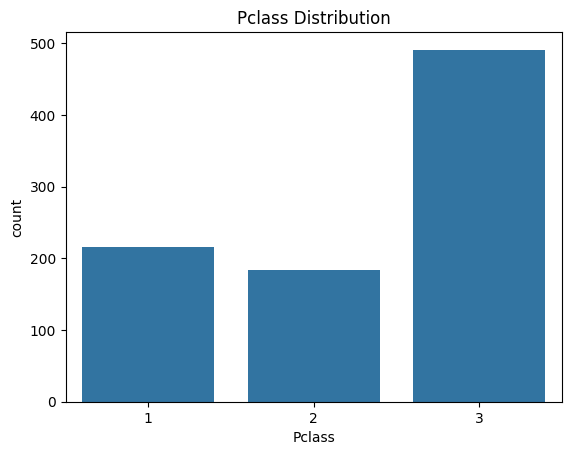

In [15]:
# countplot for Pclass
sns.countplot(x="Pclass", data=df)
plt.title('Pclass Distribution')

Most people wer in 3rd Class

<Axes: title={'center': 'Age Distribution'}, xlabel='Age', ylabel='Density'>

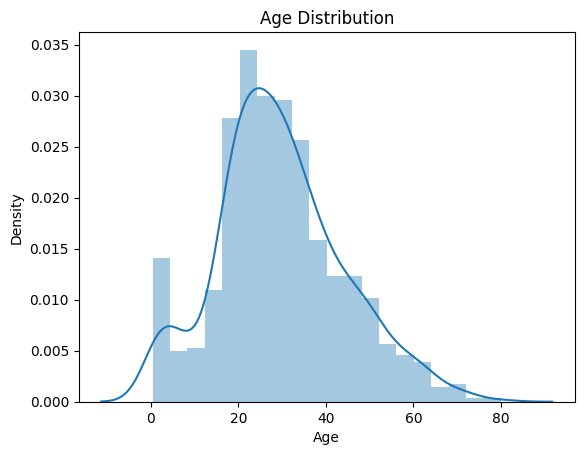

In [16]:
# Age distibution
plt.title('Age Distribution')
sns.distplot(df["Age"], kde=True)

<Axes: xlabel='Pclass', ylabel='Survived'>

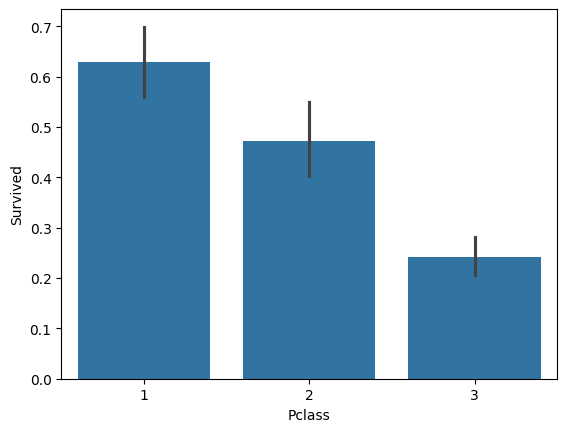

In [17]:
# pclass vs survived
sns.barplot(x="Pclass", y="Survived", data=df)

Text(0.5, 1.0, 'Embarked Distribution')

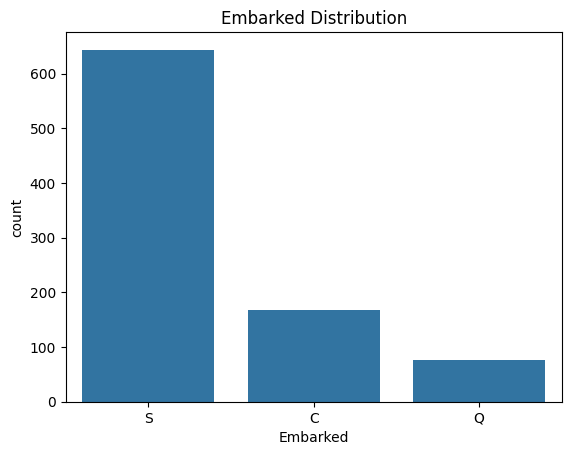

In [18]:
# embarked distribution
sns.countplot(x="Embarked", data=df)
plt.title('Embarked Distribution')

Text(0.5, 1.0, 'Family Size Distribution')

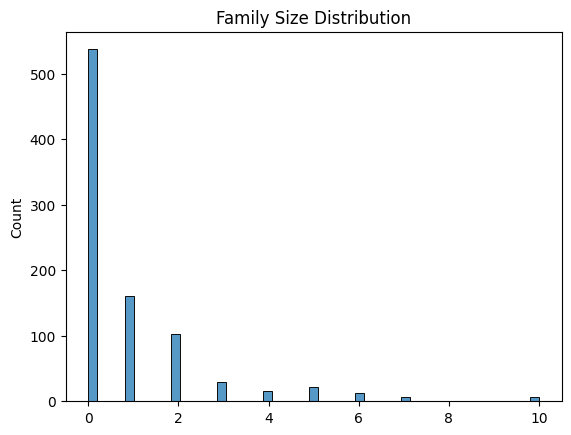

In [19]:
# family size distribution
sns.histplot(df["SibSp"] + df["Parch"])
plt.title('Family Size Distribution')

# <p style="background-color: lightgreen; font-family: Allura; color: black; font-size: 90%; text-align: center; border-radius: 15px 15px; padding: 15px;"><strong>Data Wrangling</strong></p>

In [20]:
(df.isnull().sum() / len(df)) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [21]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [22]:
# fill missing Age values with the mean
df['Age'].fillna(df['Age'].mean(), inplace=True)

# Drop the Cabin column
df.drop('Cabin', axis=1, inplace=True)

# fill missing Embarked values with the mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Calculate the percentage of missing values for each column
(df.isnull().sum() / len(df)) * 100

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64

Data has been cleaned from null vales

In [23]:
df.select_dtypes(include='object')

,Name,Sex,Ticket,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,S
4,"Allen, Mr. William Henry",male,373450,S
...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,S
887,"Graham, Miss. Margaret Edith",female,112053,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,S
889,"Behr, Mr. Karl Howell",male,111369,C


In [24]:
print(f"Unique Values in Sex: {df['Sex'].unique()}")
print(f"Unique Values in Embarked: {df['Embarked'].unique()}")

Unique Values in Sex: ['male' 'female']
Unique Values in Embarked: ['S' 'C' 'Q']


In [25]:
df.replace({'Sex': {'male':0, 'female':1}}, inplace=True)
df.replace({'Embarked': {'S':0, 'C':1, 'Q':2}}, inplace=True)
print(f"Unique Values in Sex: {df['Sex'].unique()}")
print(f"Unique Values in Embarked: {df['Embarked'].unique()}")

Unique Values in Sex: [0 1]
Unique Values in Embarked: [0 1 2]


In [26]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

<Axes: >

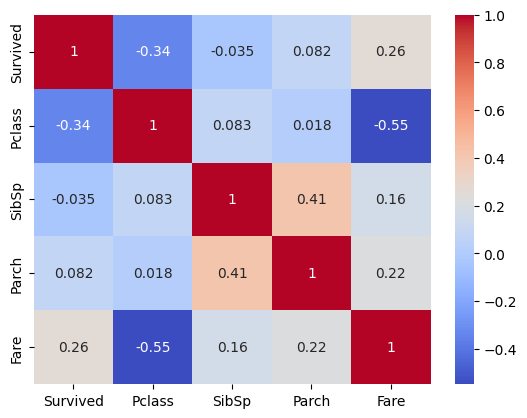

In [27]:
# corelation map
df_corr = df[['Survived', 'Pclass', 'SibSp', 'Parch','Fare']]
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm')

# <p style="background-color: lightgreen; font-family: Allura; color: black; font-size: 90%; text-align: center; border-radius: 15px 15px; padding: 15px;"><strong>Data Preprocessing</strong></p>

<Axes: xlabel='Survived', ylabel='Age'>

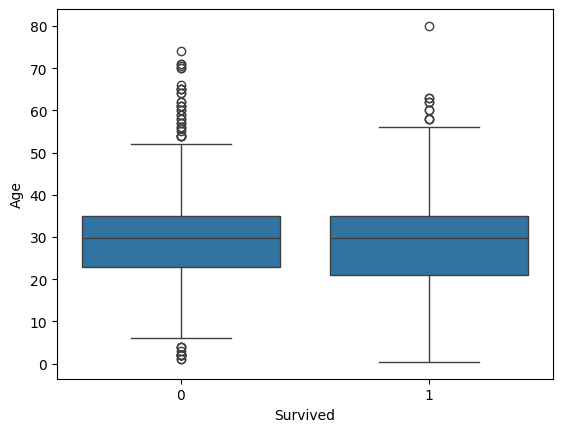

In [28]:
sns.boxplot(x='Survived', y='Age', data=df)

<Axes: xlabel='Survived', ylabel='Fare'>

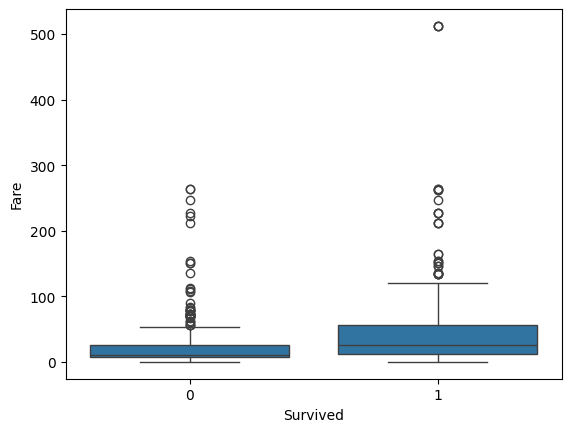

In [29]:
sns.boxplot(x='Survived', y='Fare', data=df)

<Axes: xlabel='Survived', ylabel='count'>

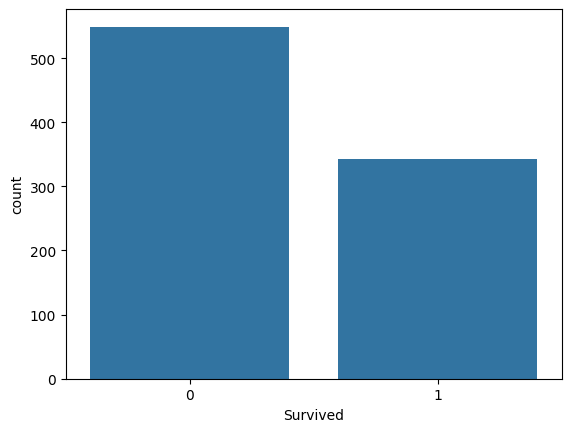

In [30]:
sns.countplot(df, x='Survived')

In [31]:
df.shape

(891, 11)

In [32]:
# function to detect outliers using IQR
import numpy as np

def detect_outliers(df, features):
    outliers = []
    for feature in features:
        if df[feature].dtype.kind in 'bifc':  # Check if feature is numeric
            Q1 = np.percentile(df[feature], 25)
            Q3 = np.percentile(df[feature], 75)
            IQR = Q3 - Q1
            outlier_step = 1.5 * IQR
            outliers.extend(df[(df[feature] < Q1 - outlier_step) | (df[feature] > Q3 + outlier_step)].index)
    return outliers

# Detect outliers
features = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']  # Remove non-numeric features
outliers = detect_outliers(df, features)

df = df.drop(outliers).reset_index(drop=True)

print("Outliers removed. Data shape:", df.shape)

Outliers removed. Data shape: (577, 11)


<Axes: xlabel='Survived', ylabel='Age'>

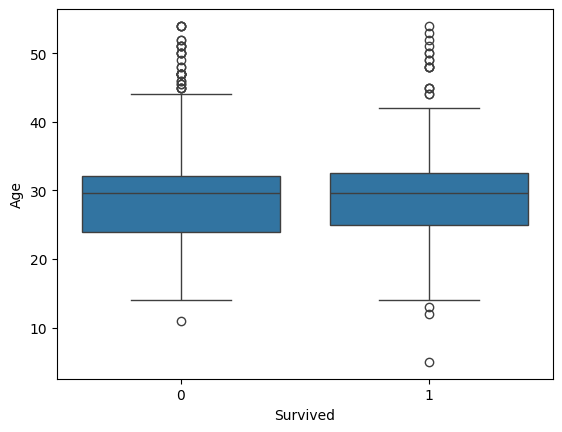

In [33]:
sns.boxplot(x='Survived', y='Age', data=df)

Featues & Target

In [34]:
df.select_dtypes(exclude='object')

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.000000,1,0,7.2500,0
1,3,1,3,1,26.000000,0,0,7.9250,0
2,4,1,1,1,35.000000,1,0,53.1000,0
3,5,0,3,0,35.000000,0,0,8.0500,0
4,6,0,3,0,29.699118,0,0,8.4583,2
...,...,...,...,...,...,...,...,...,...
572,885,0,3,0,25.000000,0,0,7.0500,0
573,887,0,2,0,27.000000,0,0,13.0000,0
574,888,1,1,1,19.000000,0,0,30.0000,0
575,890,1,1,0,26.000000,0,0,30.0000,1


In [35]:
X = df[["Pclass", "Sex", "SibSp", "Parch", "Fare"]]
y = df['Survived']

X.isnull().sum()

Pclass    0
Sex       0
SibSp     0
Parch     0
Fare      0
dtype: int64

# <p style="background-color: lightgreen; font-family: Allura; color: black; font-size: 90%; text-align: center; border-radius: 15px 15px; padding: 15px;"><strong>Model Selection & Evaluation</strong></p>

In [36]:
# Load the test data (not training data)
df_test = pd.read_csv('../data/1. raw/test.csv')

# Define the features to use
features = df_test[["Pclass", "Sex", "SibSp", "Parch", "Fare"]]

# Create dummy variables for categorical features
features.replace({'Sex': {'male':0, 'female':1}}, inplace=True)
X_test = features
X_test['Fare'].fillna(df['Fare'].mean(), inplace=True)
X_test.isnull().sum()

Pclass    0
Sex       0
SibSp     0
Parch     0
Fare      0
dtype: int64

In [37]:
X

,Pclass,Sex,SibSp,Parch,Fare
0,3,0,1,0,7.2500
1,3,1,0,0,7.9250
2,1,1,1,0,53.1000
3,3,0,0,0,8.0500
4,3,0,0,0,8.4583
...,...,...,...,...,...
572,3,0,0,0,7.0500
573,2,0,0,0,13.0000
574,1,1,0,0,30.0000
575,1,0,0,0,30.0000


<Axes: xlabel='Fare', ylabel='Density'>

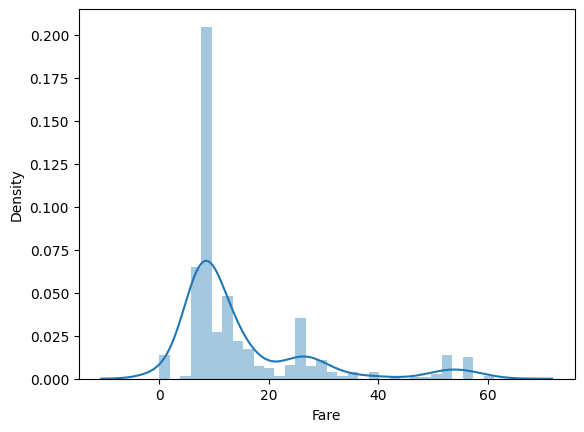

In [42]:
# Fare distribution
sns.distplot(X['Fare'], kde=True)

<Axes: xlabel='Fare', ylabel='Density'>

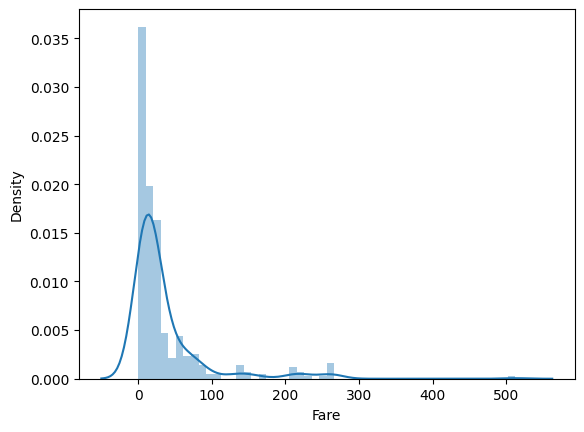

In [43]:
sns.distplot(X_test['Fare'], kde=True)

Decison Tree Classifier

In [109]:
from sklearn.metrics import f1_score

# Params
n_estimators = 100
max_depth = None 
min_samples_split = 2
min_samples_leaf = 10
max_features = 'auto'

# RandomForestClassifier
rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, max_features=max_features)
rf.fit(X, y)

# Make predictions on the test data
rf_predict = rf.predict(X_test)

# f1 score
f1 = f1_score(y, rf.predict(X), average='weighted')

# <p style="background-color: lightgreen; font-family: Allura; color: black; font-size: 90%; text-align: center; border-radius: 15px 15px; padding: 15px;"><strong>MLFlow Experiment</strong></p>

In [111]:
import mlflow
from datetime import datetime
TRACKING_URI = "https://mlflow-server-wno7iop4fa-uc.a.run.app/"

# Set the tracking URI for the MLflow experiment
mlflow.set_tracking_uri(TRACKING_URI)

In [112]:
# Create an experiment if it doesn't exist
experiment_name = "Titanic-Dataset"
if not mlflow.get_experiment_by_name(name=experiment_name):
    mlflow.create_experiment(
        name=experiment_name
    )
experiment = mlflow.get_experiment_by_name(experiment_name)

# Define the run name and tags for the experiment
run_name = datetime.now().strftime("%Y-%m-%d_%H:%M")
tags = {
    "env": "test",
    "data_date": "2024-07-17",
    "model_type": "RandomForestClassifier",
    "experiment_description": "Titanic dataset - Desafio Casas Bahia"
}

# Start the MLflow run
with mlflow.start_run(
    experiment_id=experiment.experiment_id, 
    run_name=run_name, 
    tags=tags
):
    # Log the hyperparameters used in the model
    mlflow.log_param("n_estimators", n_estimators)
    mlflow.log_param("max_depth", max_depth)
    mlflow.log_param("min_samples_split", min_samples_split)
    mlflow.log_param("min_samples_leaf", min_samples_leaf)
    mlflow.log_param("max_features", max_features)
    
    # Log the metrics
    mlflow.log_metric("f1_score", f1)
    
    # Log the model
    mlflow.sklearn.log_model(rf, "model")
    
    # End the MLflow run
    mlflow.end_run()